# Loan Features' Impact on Loan Amount
## by Igwe Emmanuel





## Investigation Overview


I took the position of a Borrower in this study. What determines the maximum Loan Amount that can be disbursed to a Borrower is something I'm curious about. Stated Monthly Income, Debt to Income Ratio, Loan Term, and Prosper risk score were the major considerations.




## Dataset Overview

About 114,000 rows of loan data, including the Loan Original Amount and other characteristics, made up the data. A portion of the data was obtained. StatedMonthlyIncome, DebttoIncome Ratio, Loan Term, Prosper risk score, and other variables were among the features. Due to errors and insufficient data, certain data points were eliminated.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe

# load in the dataset into a pandas dataframe
# load in the dataset into a pandas dataframe
df_loan =  pd.read_csv('UpdatedLoanData.csv')


In [4]:
# Convert LoanStatus, ProsperRating (Alpha), ProsperScore into ordered categorical types
ordinal_var_dict = {'LoanStatus': ['Cancelled',  'Chargedoff', 'Completed', 'Current', 'Defaulted', 'FinalPaymentInProgress'
                                   ,'Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)',
                                   'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)'],
                    'ProsperRating (Alpha)': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
                    'ProsperScore': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                   'LoanOriginationMonth': ['January','Febuary', 'March','April','May','June','July','August','September',
                                            'October','November','December'],
                   'LoanOriginationYear' : [2009, 2010, 2011, 2012, 2013, 2014],
                   'IncomeRange' : ['Not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999',
                                   '$75,000-99,999','$100,000+']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    df_loan[var] = df_loan[var].astype(ordered_var)

In [5]:
# Using IQR method to detect outliers
Q1 = df_loan['StatedMonthlyIncome'].quantile(0.25)
Q3 = df_loan['StatedMonthlyIncome'].quantile(0.75)
IQR = Q3 - Q1
LowerLimit = Q1 - 1.5*IQR  #Data which falls below this is an outlier
UpperLimit = Q3 + 1.5*IQR  #Data which falls above this is an outlier
print(LowerLimit, UpperLimit)

-1918.0 12618.0


In [ ]:
# Transformation to remove outliers
# Trimming
df_clean = df_clean[df_clean['StatedMonthlyIncome'] < UpperLimit]

In [7]:
# Transformation to remove outliers
# Trimming
df_loan = df_loan[df_loan['StatedMonthlyIncome'] < UpperLimit]

## Distribution of Loan Amount

Loan Amounts in the dataset are given out in rounded figures and in multiples of 5,000 dollars. Investigating on a smaller bin size, the distribution is Trimodal with majority of loan amount given out at 4,000 , 10,000 and 15,0000 dollars.

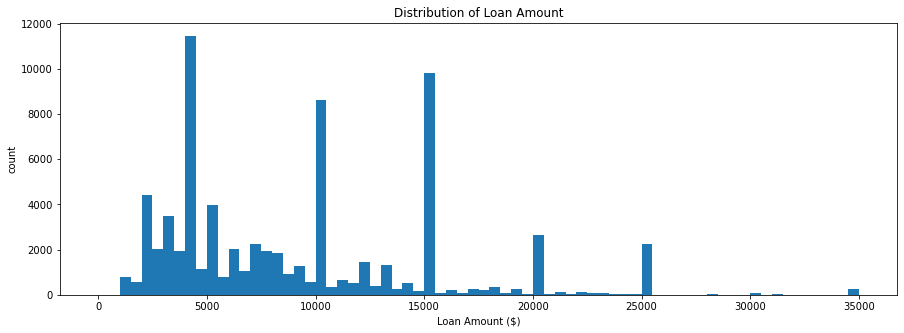

In [8]:
binsize = 500
bins = np.arange(0, df_loan['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[15, 5])
plt.hist(data = df_loan, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Loan Amount ($)')
plt.ylabel('count')
plt.title('Distribution of Loan Amount');
plt.show()

## Distribution of Monthly Loan Payment

The distribution is unimodal with a large number of Borrowers making a monthly payment at approximately 200 dollars. Majority of the monthly loan payment is below 500 dollars.

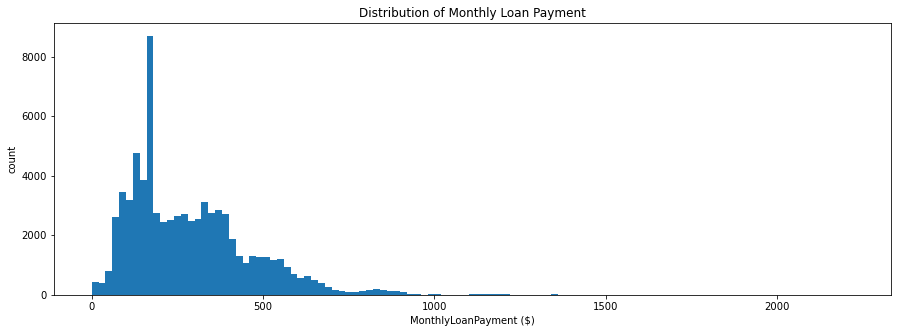

In [10]:
binsize = 20
bins = np.arange(0, df_loan['MonthlyLoanPayment'].max()+binsize, binsize)

plt.figure(figsize=[15, 5])
plt.hist(data = df_loan, x = 'MonthlyLoanPayment', bins = bins);
plt.xlabel('MonthlyLoanPayment ($)');
plt.ylabel('count');
plt.title('Distribution of Monthly Loan Payment');
plt.show()

## Distribution of Borrowers Monthly Income (Stated Monthly Income)

Stated Monthly Income had a long-tailed distribution with a lot of people earning on the low stated Monthly Income end. When trimmed and capped to remove outliers, a significant peak is found around the 4,000(dollars) mark. Its interesting to note a little peak at $0 as well. This is representing people who are unemployed.

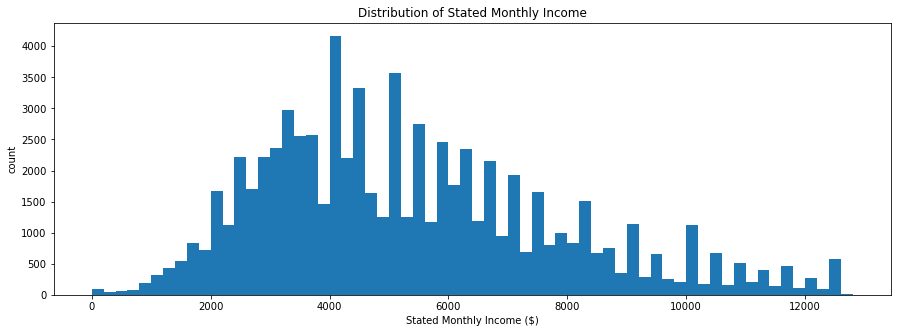

In [11]:
binsize = 200
bins = np.arange(0, df_loan['StatedMonthlyIncome'].max()+binsize, binsize)
plt.figure(figsize=[15, 5])
plt.hist(data = df_loan, x = 'StatedMonthlyIncome', bins=bins)
plt.xlabel('Stated Monthly Income ($)')
plt.ylabel('count')
plt.title('Distribution of Stated Monthly Income');
plt.show()

## Loan Amount by Stated Monthly Income

My earlier assumptions is that the higher the Monthly Income the higher the Loan Amount. This assumption is proven to be true from the following plot. When a borrower has relatively low Monthly Income (<8,000) the probabilities of getting low and high Loan Amount are similar. However, when the borrower’s Monthly Income is high (>8,000), he/she is more likely to get a Large Loan Amount

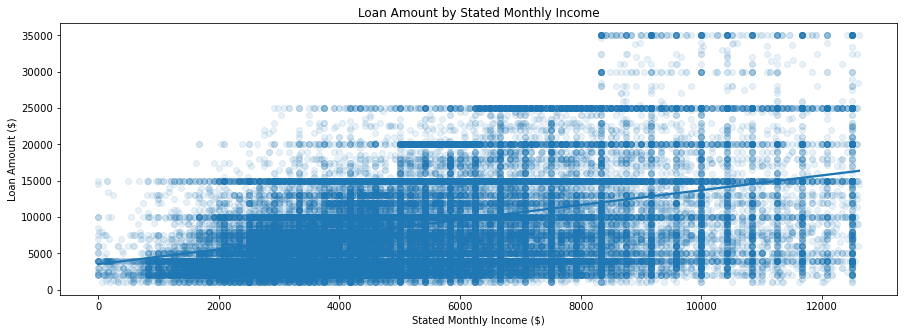

In [12]:
plt.figure(figsize=[15,5]);
sb.regplot(data=df_loan, x='StatedMonthlyIncome', y='LoanOriginalAmount', x_jitter=0.3, scatter_kws=({'alpha':1/10}));
plt.title('Loan Amount by Stated Monthly Income');
plt.xlabel('Stated Monthly Income ($)');
plt.ylabel('Loan Amount ($)');

## Loan Amount by Monthly Loan Payment

There is a strong positive relationship between Loan Amount and Monthly Loan Payment. This is likely because, monthly Loan payment is decided or calculated using the Loan amount.
I see that the plot seems to be split into three lines, because of the effect of a categorical variable.

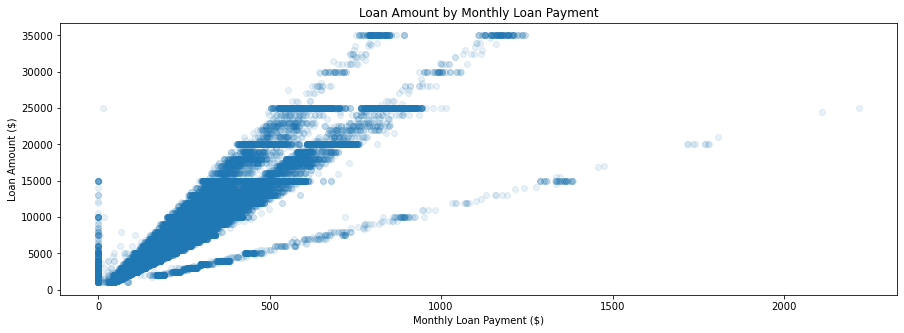

In [13]:
plt.figure(figsize=[15, 5])
sb.regplot(data=df_loan, x='MonthlyLoanPayment', y='LoanOriginalAmount',
           fit_reg=False, x_jitter=0.3, scatter_kws=({'alpha':1/10}));
plt.xlabel('Monthly Loan Payment ($)')
plt.ylabel('Loan Amount ($)')
plt.title('Loan Amount by Monthly Loan Payment');

## Loan Amount Across Loan Term and Monthly Loan Payment

We can see how the categorical variable, Loan Term affects the correlation. Borrowers with longer Loan Term 36, 60 months receives higher Loan amount.
For a maximum Loan Amount of 35,000 the Loan Term is longer,(36 or 60 months)

Also, For longer Loan Terms the scheduled monthly payment is less than that of small term (12months).

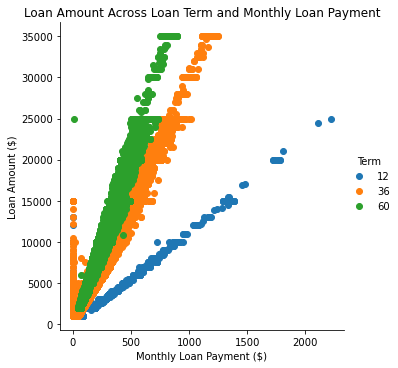

In [14]:
g = sb.FacetGrid(data = df_loan, hue = 'Term', size = 5);
g.map(plt.scatter, 'MonthlyLoanPayment', 'LoanOriginalAmount');
plt.title('Loan Amount Across Loan Term and Monthly Loan Payment')
plt.xlabel('Monthly Loan Payment ($)');
plt.ylabel('Loan Amount ($)')
g.add_legend();

## Average Loan Amount given out by Prosper Risk Score

Generally the Loan Amount increases as the Prosper risk reduces(or Prosper number increases). This shows that low/no risk borrowers have a higher chance of getting larger Loan Amounts.

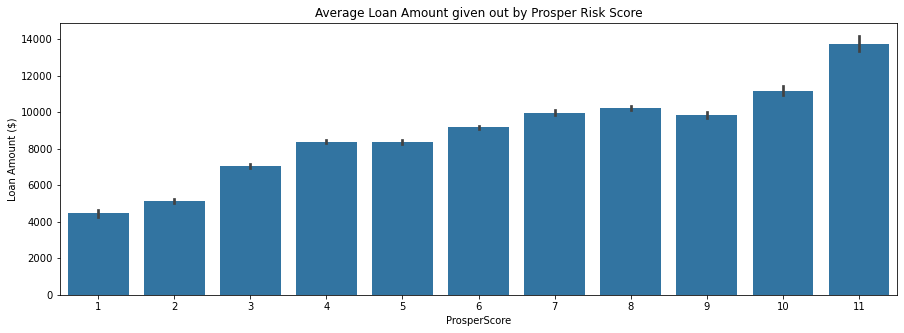

In [15]:
plt.figure(figsize=[15,5])
base_color = sb.color_palette()[0]
sb.barplot(data=df_loan, x='ProsperScore', y='LoanOriginalAmount', color=base_color)
plt.ylabel('Loan Amount ($)');
plt.title('Average Loan Amount given out by Prosper Risk Score');

## Loan Amount Across Loan Term and Prosper Score

For a larger loan term (in months) and a high Prosper Score (less risk) say 10/11, the Borrower is more likely to get a large Loan Amount.

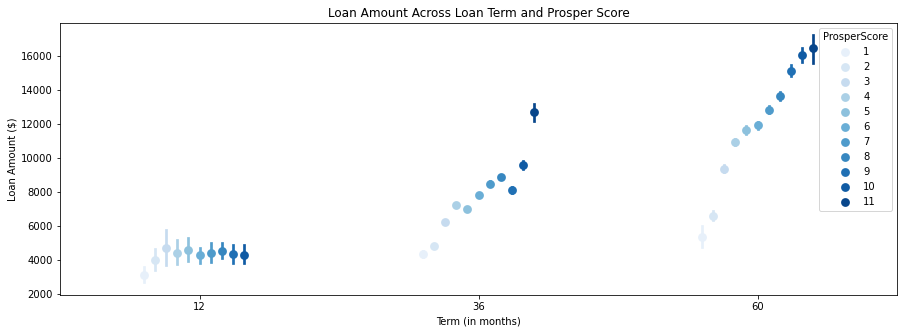

In [16]:
fig = plt.figure(figsize = [15,5])
ax = sb.pointplot(data = df_loan, x = 'Term', y = 'LoanOriginalAmount', hue = 'ProsperScore',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Loan Amount Across Loan Term and Prosper Score')
plt.ylabel('Loan Amount ($)')
plt.xlabel('Term (in months)')
plt.show();

## Loan Amount Across Prosper Score and Home Ownership

Home-owners with a good Prosper score(low risk) is likely to get a Large Loan Amount.

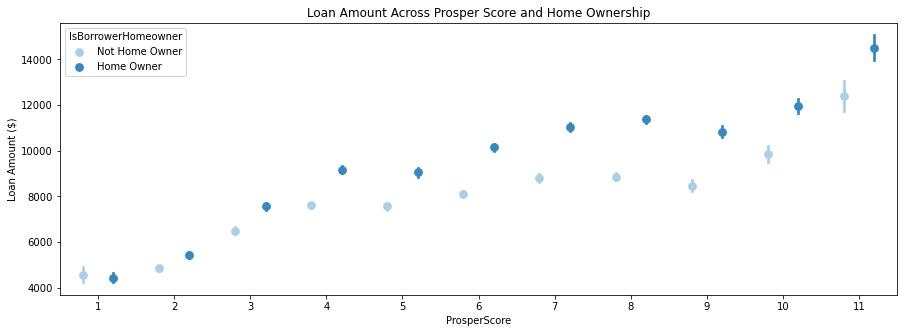

In [17]:
fig = plt.figure(figsize = [15,5])
ax = sb.pointplot(data = df_loan, x = 'ProsperScore', y = 'LoanOriginalAmount', hue = 'IsBorrowerHomeowner',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Loan Amount Across Prosper Score and Home Ownership')
plt.ylabel('Loan Amount ($)')
plt.xlabel('ProsperScore')
plt.show();

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt